In [81]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.style.use("ggplot") 

## **Cleaning data**

Most of the time `NA` values are undesired, so we basically remove them by using the `.dropna()` method. There are two main ways to use this

1. The first one is to simply do `df.dropna(inplace=True)`. The inplace argument will apply the change directly in the dataframe without having to reassign manually.
2. We can also do `df = df.dropna()` which is manually reassigning and override the dataframe. There is also the option to create a new variable to work with a copy of the dataframe.

The `.dropna()` method also receives more arguments, to specify how do we want to remove `NA` values and more, which can be consulted in the documentation [here](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.dropna.html)

In [82]:
df = pd.read_csv("../data/dataset_banco.csv")

print(f'Dataframe shape with NA values: {df.shape}')

df.dropna(inplace=True) # this drops NA values and updates the dataframe
df = df.dropna() # this is equivalent to the code line above

print(f'Dataframe shape without NA values: {df.shape}')

Dataframe shape with NA values: (45215, 17)
Dataframe shape without NA values: (45207, 17)


When dealing with category columns, it is desired that these have at least two distinct elements, which means that if a categorical column has a single distinct element, is would not be quite useful. By calling the `.nunique()` method in the dataframe, it will display all the column names and the amount of distinct items each one have. We can also remove the duplicate rows in the dataset by using `.drop_duplicates()`

In [83]:
print(df.nunique())

print(f'\nDatashape shape before deleting duplicate rows: {df.shape}')

df.drop_duplicates(inplace=True)

print(f'Datashape shape after deleting duplicate rows: {df.shape}')

age            85
job            18
marital         6
education      10
default         2
balance      7168
housing         2
loan            6
contact         5
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        6
y               2
dtype: int64

Datashape shape before deleting duplicate rows: (45207, 17)
Datashape shape after deleting duplicate rows: (45203, 17)


### **Outliers identification**

Outliers are particular data cells that contain suspicious values. For example, if we have a column representing the age of users in a dataframe, it would not make any sense that some of the records were `560` because no one lives that long (unless you are a greenland shark but I highly doubt it).

Boxplot charts are particularly usefult to detect outliers. Here's the basic structure on how to read one:

<div align="center">
  <img src="https://miro.medium.com/v2/resize:fit:1200/1*0MPDTLn8KoLApoFvI0P2vQ.png" width="500">
</div>


The box extends from the first quartile (Q1) to the third quartile (Q3) with a strip at the *median*. The whiskers extend from the box to the furthest data point lying within 1.5 times the inter-quartile range from the box, and values outside the whiskers are considered to be outliers. Documentation can be found [here](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.boxplot.html).

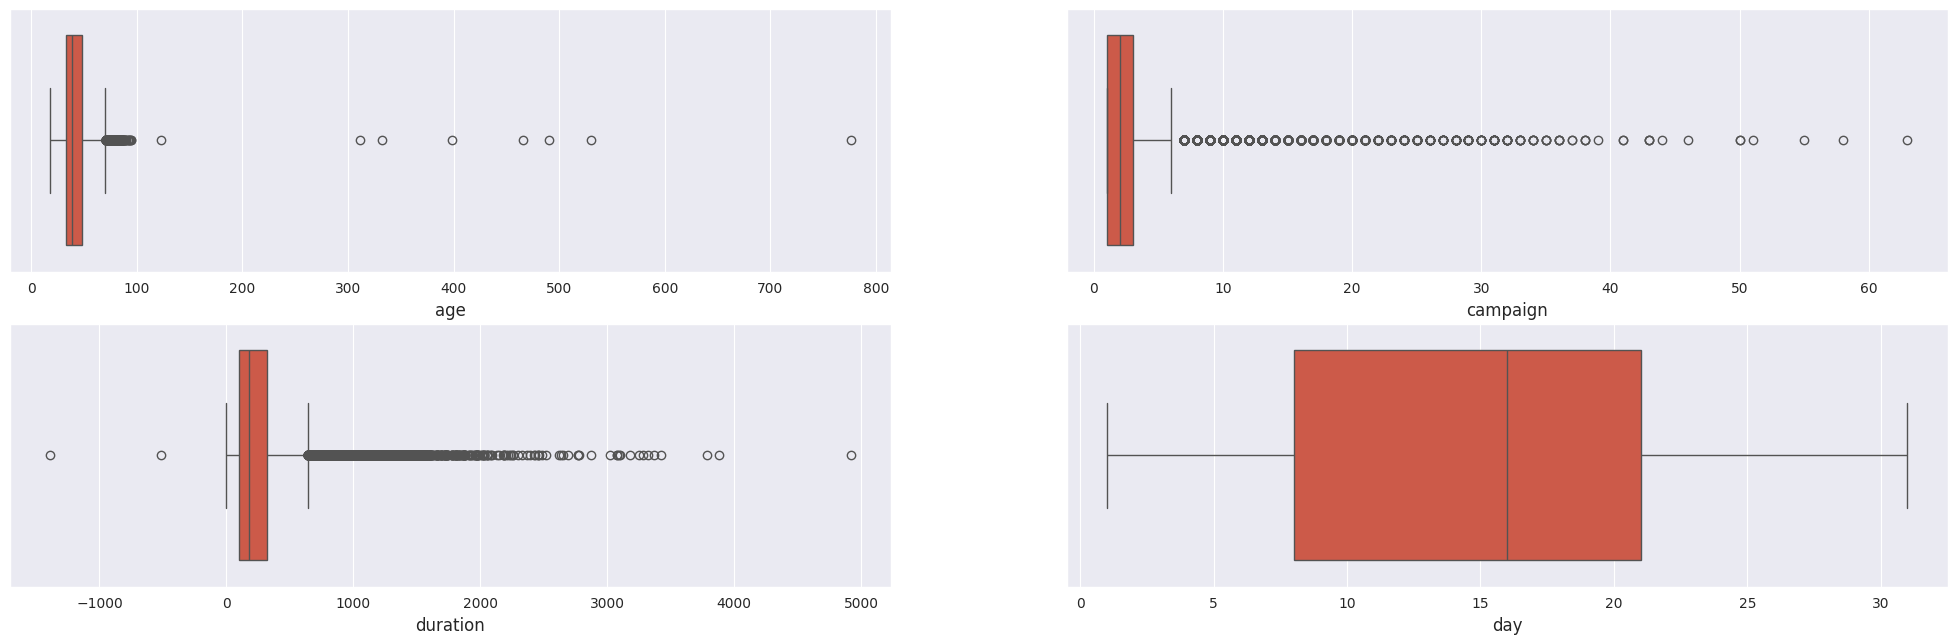

In [84]:
sns.set_style("darkgrid")

fig, axs = plt.subplots(2,2, figsize=(25,7.5))

sns.boxplot(data=df['age'], ax=axs[0,0], orient='h')
sns.boxplot(data=df['campaign'], ax=axs[0,1], orient='h')
sns.boxplot(data=df['duration'], ax=axs[1,0], orient='h')
sns.boxplot(data=df['day'], ax=axs[1,1], orient='h')
plt.show()

###  **Boxplot interpretation**
Let us consider the boxplot for the `age` variable. The red box represents the *interquartile range (IQR)* of the data, which contains the middle 50% of the data (between the 25th Q1 and 75th percentiles Q3). The vertical line inside the box is the *median* (50th percentile Q2) which turns out to be `39`. The whiskers represent the minimum and maximum values within 1.5 times the IQR, and values outside the whiskers are considered outliers. As shown in the age boxplot, there are various outlier in the rightmost side, especially those with ages greater than 100. This is why boxplots are useful, beacuse they allow us to identify strange observations within the data, so we can later determine if they are outliers or not. In the case of the `age`, even though the outliers are values greater than ~80 years, we may considered values from 80 to 100 as normal data, and as outliers values greater than 100.

Now you may be wondering that the outliter criteria can be a little subjective, because the calculation of $Q_1 - 1.5IQR$ and $Q_3 + 1.5IQR$ seems to come out of nowhere. This rule was developed by John Tukey (the same guy who invented the Fourier Transform) and comes from the idea that most normally distributed data lies within a predictable range, and in a normal distribution, about 99.3% of the data lies within the range $Q_1 - 1.5IQR$ to $Q_3 + 1.5IQR$. This is why we can say that most of the data is within the range of the boxplot.

In [85]:
df['age'].describe()

count    45203.000000
mean        41.005177
std         12.037387
min         18.000000
25%         33.000000
50%         39.000000
75%         48.000000
max        776.000000
Name: age, dtype: float64

### **Dropping values**

In [86]:
print(f'Dataframe shape before deleting outliers: {df.shape}')

df = df[df['age'] <=  100]
df = df[df['duration'] > 0]
df = df[df['previous'] <=  100]

print(f'Dataframe shape after deleting outliers: {df.shape}')

Dataframe shape before deleting outliers: (45203, 17)
Dataframe shape after deleting outliers: (45189, 17)


### **Fixing typography errors**

In categorical data, it is extremely common that if the data comes from an external source that has been filled by users (such as a survey or a form in a website), there are typos or values that represent the same thing but are written differently. This is something we must also take care of when cleaning the data and can be done by using the `.replace()` method in a pandas series (or column).

In [ ]:
df['job'] = df['job'].replace(['MANAGEMENT', 'Management'], 'management')
df['job'] = df['job'].replace(['admin.'], 'administrative')
df['job'] = df['job'].replace(['Self-employed'], 'self-employed')
df['job'] = df['job'].replace(['Services'], 'services')
df['job'] = df['job'].replace(['Retired'], 'retired')

df['education'] = df['education'].replace(['SECONDARY', 'Secondary', 'sec.'],'secondary')
df['education'] = df['education'].replace(['Primary'],'primary')

df['education'] = df['education'].replace(['UNK'], 'unknown')
df['education'] = df['education'].replace(['Tertiary'], 'tertiary')

df['marital'] = df['marital'].replace(['div.', 'DIVORCED'], 'divorced')
df['marital'] = df['marital'].replace(['Single'], 'single')

df['contact'] = df['contact'].replace(['phone'], 'telephone')

df['poutcome'] = df['poutcome'].replace(['UNK'], 'unknown')
df['poutcome'] = df['poutcome'].replace(['Success'], 'success')

Now, there is a much clever way to do this. Instead of manually writting a replace line for each of the columns, we can define a dictionary with the column names as keys and the replacements as values, and then use the `.replace()` method with a single argument, which is that dictionary.

In [88]:
replace_dict = {
    'job': {
        'MANAGEMENT': 'management',
        'Management': 'management',
        'admin.': 'administrative',
        'Self-employed': 'self-employed',
        'Services': 'services',
        'Retired': 'retired'
    },
    'education': {
        'SECONDARY': 'secondary',
        'Secondary': 'secondary',
        'sec.': 'secondary',
        'Primary': 'primary',
        'Tertiary': 'tertiary',
        'UNK': 'unknown'
    },
    'marital': {
        'Div.': 'divorced',
        'DIVORCED': 'divorced',
        'Single': 'single'
    },
    'contact': {
        'phone': 'telephone'
    },
    'poutcome': {
        'UNK': 'unknown',
        'Success': 'success'
    }
}


df.replace(replace_dict, inplace=True)

<Axes: xlabel='job'>

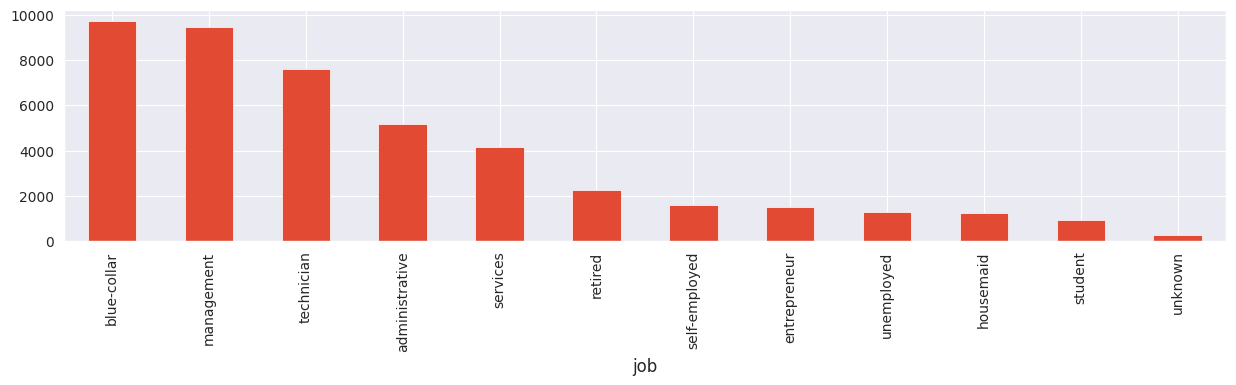

In [89]:
plt.figure(figsize=(15,3))
df['job'].value_counts().plot(kind='bar')